In [1]:
import pandas as pd
import numpy as np
import random
from lib.get_plots import *
from lib.sba_transform import *
from lib.model_pipeline import *
# from lib.dt_model import *
from lib.demo_model_pipeline import * 
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 7)   # caution: plt namespace may be taken

Populating the interactive namespace from numpy and matplotlib


/Users/ywang/anaconda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['random', 'figure']
`%matplotlib` prevents importing * from pylab and numpy



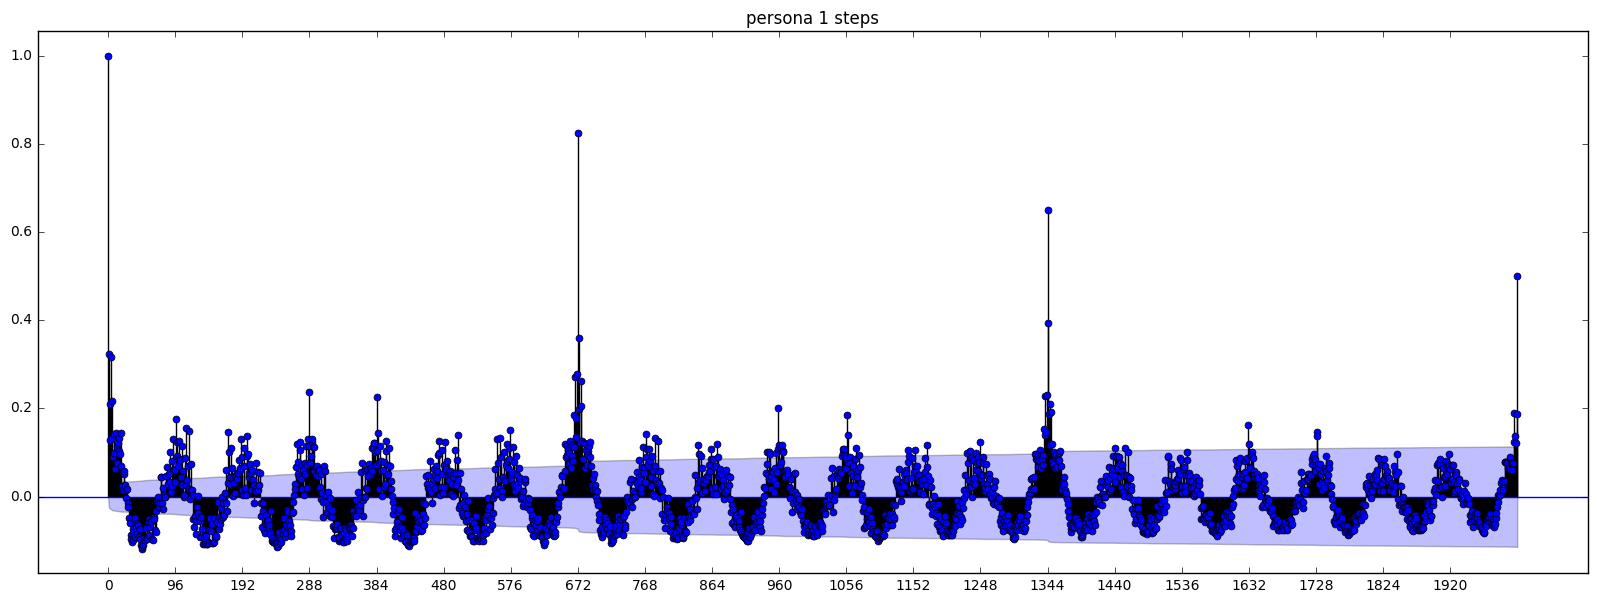

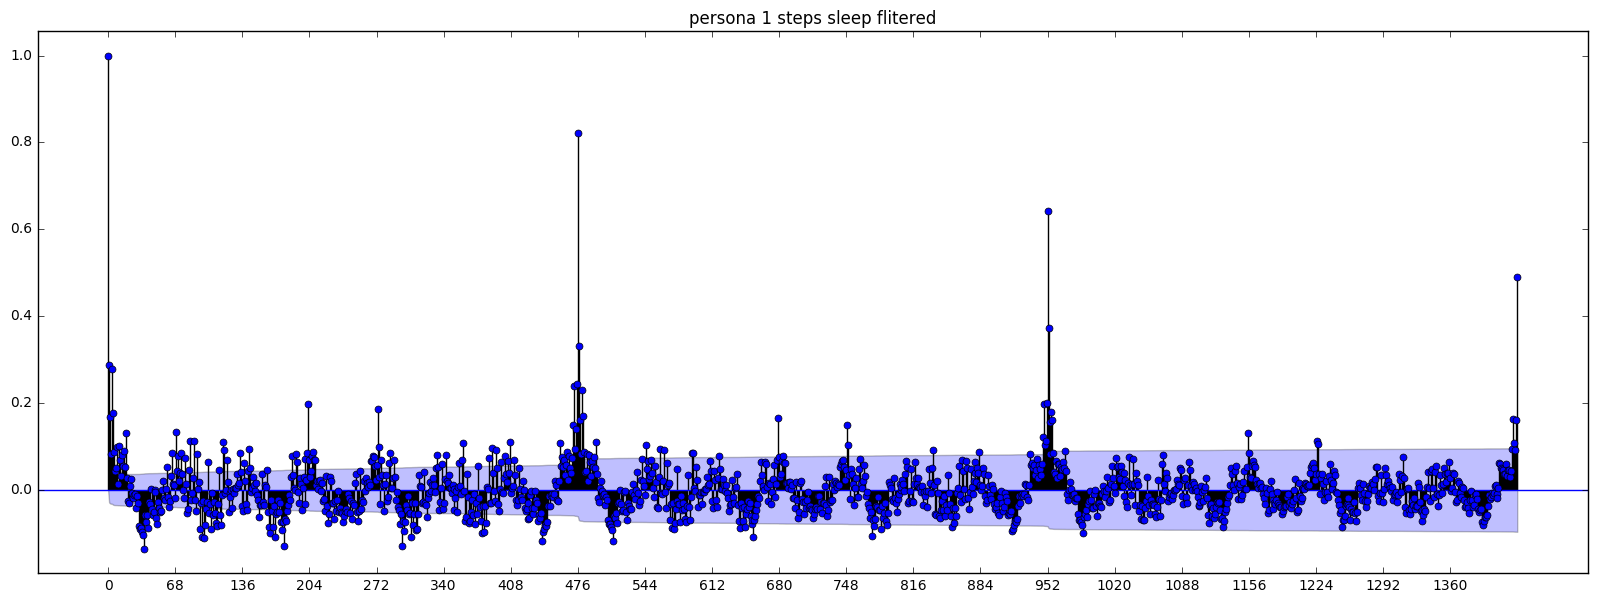

In [58]:
persona = pd.read_csv('demo/persona model.csv', parse_dates=['date_time'], dayfirst=True)  #  
persona.describe()
persona = sba_pipeline(persona)
# with sleeping time
get_plot_acf(persona.steps, 96*21, 96, title='persona 1 steps')
# without sleeping time
get_plot_acf(filter_sleeping_time(persona).steps, 68*21, 68, title='persona 1 steps sleep flitered')

In [57]:
persona.loc[:, 'date_time'] = pd.to_datetime(persona.loc[:, 'date_time'], format='%d/%m/%Y %H:%M')
persona.set_index(['date_time'], inplace=True, drop=True)
persona

ValueError: time data '21/8/16 0:00' does not match format '%d/%m/%Y %H:%M' (match)

In [53]:
persona.index[1200].month

2

In [77]:
# persona.set_index(['date_time'], inplace=True, drop=True)
data = persona
table = data.groupby([data.index.week, data.index.date])['steps'].mean().reset_index()
print(table)
table.rename(columns={'level_0': 'week', 'level_1': 'dayofweek'}, inplace=True)

    level_0     level_1       steps
0        33  2016-08-21   29.385417
1        34  2016-08-22   50.781250
2        34  2016-08-23   45.427083
3        34  2016-08-24   35.583333
4        34  2016-08-25   33.625000
5        34  2016-08-26   45.843750
6        34  2016-08-27  120.041667
7        34  2016-08-28   29.385417
8        35  2016-08-29   50.781250
9        35  2016-08-30   45.427083
10       35  2016-08-31   35.583333
11       35  2016-09-01   33.625000
12       35  2016-09-02   45.843750
13       35  2016-09-03  120.041667
14       35  2016-09-04   29.385417
15       36  2016-09-05   50.781250
16       36  2016-09-06   45.427083
17       36  2016-09-07   35.583333
18       36  2016-09-08   33.625000
19       36  2016-09-09   45.843750
20       36  2016-09-10  120.041667
21       36  2016-09-11   29.385417
22       37  2016-09-12   50.781250
23       37  2016-09-13   45.427083
24       37  2016-09-14   35.583333
25       37  2016-09-15   33.625000
26       37  2016-09-16   45

In [80]:
table.dayofweek[1]

datetime.date(2016, 8, 22)

In [73]:
from scipy.stats.stats import spearmanr
corr, p = spearmanr(data.heart, data.steps)[0:2]

In [76]:
p

0.0

In [72]:
data.index.dayofweek[0]

6

In [70]:
data.sort_index(inplace=True)
kk = data['heart'].tolist()
kk

[77,
 77,
 67,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 82,
 82,
 95,
 100,
 75,
 75,
 75,
 75,
 95,
 82,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 75,
 68,
 82,
 82,
 75,
 75,
 68,
 82,
 68,
 68,
 68,
 68,
 82,
 100,
 90,
 90,
 90,
 100,
 82,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 75,
 68,
 82,
 100,
 95,
 82,
 75,
 68,
 68,
 68,
 77,
 77,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 82,
 82,
 68,
 68,
 82,
 110,
 75,
 75,
 75,
 75,
 95,
 78,
 78,
 78,
 78,
 95,
 100,
 90,
 90,
 90,
 100,
 100,
 75,
 75,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 100,
 90,
 90,
 90,
 100,
 100,
 100,
 75,
 75,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 68,
 82,
 82,
 82,
 82,
 68,
 82,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55

In [14]:
data.index

DatetimeIndex(['2016-08-21 00:00:00', '2016-08-21 00:15:00',
               '2016-08-21 00:30:00', '2016-08-21 00:45:00',
               '2016-08-21 01:00:00', '2016-08-21 01:15:00',
               '2016-08-21 01:30:00', '2016-08-21 01:45:00',
               '2016-08-21 02:00:00', '2016-08-21 02:15:00',
               ...
               '2016-10-27 21:30:00', '2016-10-27 21:45:00',
               '2016-10-27 22:00:00', '2016-10-27 22:15:00',
               '2016-10-27 22:30:00', '2016-10-27 22:45:00',
               '2016-10-27 23:00:00', '2016-10-27 23:15:00',
               '2016-10-27 23:30:00', '2016-10-27 23:45:00'],
              dtype='datetime64[ns]', name='date_time', length=6528, freq=None)